# ***7.MULTIPLE LINEAR REGRESSION***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [2]:
cars=pd.read_csv("ToyotaCar.csv")
cars.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


### 1]Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
cars.isnull()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False


In [5]:
cars.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [6]:
#As the given data dont have any null values thus there is no need for deletion or treating them

In [7]:
#Here Fuel type is object ttype convertting it into int type

In [8]:
from sklearn.preprocessing import OrdinalEncoder
one=OrdinalEncoder()

In [9]:
cars["Fuel_Type"]=one.fit_transform(cars[["Fuel_Type"]]).astype("int")

In [10]:
cars['Fuel_Type'].head()

,Fuel_Type
0,1
1,1
2,1
3,1
4,1


In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int64(11)
memory usage: 123.5 KB


<Axes: >

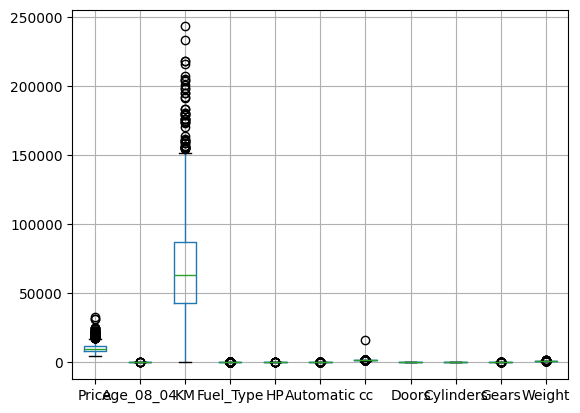

In [12]:
cars.boxplot()

In [13]:
cars.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [14]:
def outlier_capping(cars,column):
 Q1=cars[column].quantile(0.25)
 Q3=cars[column].quantile(0.75)
 IQR=Q3-Q1
 UE=Q3+1.5*IQR
 LE=Q1-1.5*IQR
 cars[column]=cars[column].apply(lambda x:UE if x>UE else LE if x<LE else x)
for col in cars.select_dtypes(["int"]).columns:
 outlier_capping(cars,col)

<Axes: >

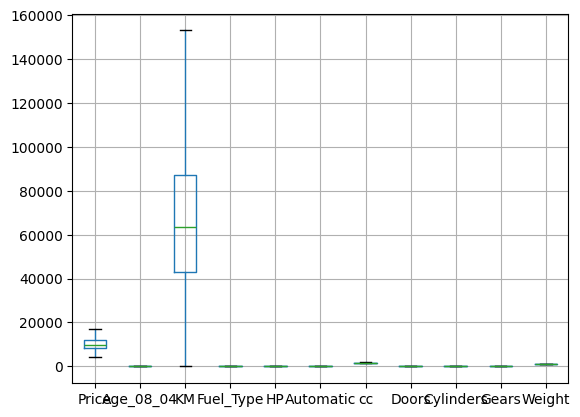

In [15]:
cars.boxplot()

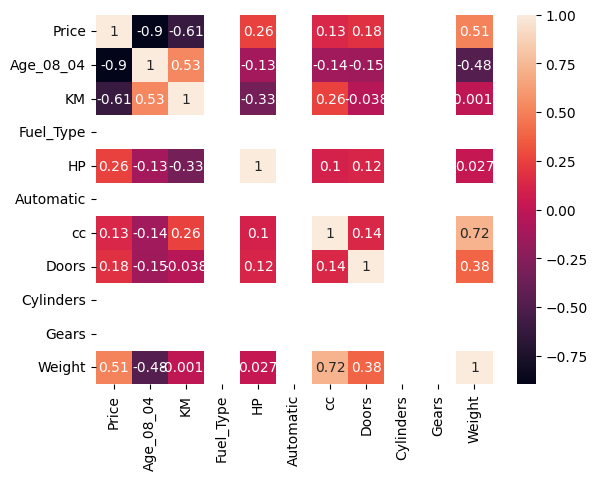

In [16]:
corr=cars.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [17]:
#Here we observe that price and age of the car are negatively correlated because as the car model would
#older the price would decrease. Also we see that km and price are negatively correlated as it may show
# the km travel by car as more the km travelled by car more the older and wear & tear of car.Similarly the
# weight of older car is less maybe due to older models lacking some new feature or upgrades added by company
# Similarly we can see positive correlation between cc and weight (increase in weight of car as capacity of cylinder fuel increases)
# also weight and price are increasing as may be new model have some upgraded safety measures, no. of doors, etc.

In [18]:
#checking for multicollinearity
y=cars[["Price"]]
x=cars.drop(columns="Price")
from statsmodels.stats.outliers_influence import variance_inflation_factor
x.reset_index(drop=True)

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23.0,46986.0,2.0,90.0,0.0,1900.0,3,4,5.0,1152.5
1,23.0,72937.0,2.0,90.0,0.0,1900.0,3,4,5.0,1152.5
2,24.0,41711.0,2.0,90.0,0.0,1900.0,3,4,5.0,1152.5
3,26.0,48000.0,2.0,90.0,0.0,1900.0,3,4,5.0,1152.5
4,30.0,38500.0,2.0,90.0,0.0,1900.0,3,4,5.0,1152.5
...,...,...,...,...,...,...,...,...,...,...
1431,69.0,20544.0,2.0,86.0,0.0,1300.0,3,4,5.0,1025.0
1432,72.0,19000.0,2.0,86.0,0.0,1300.0,3,4,5.0,1015.0
1433,71.0,17016.0,2.0,86.0,0.0,1300.0,3,4,5.0,1015.0
1434,70.0,16916.0,2.0,86.0,0.0,1300.0,3,4,5.0,1015.0


In [19]:
vif=pd.DataFrame()
vif["Features"]=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [20]:
vif.sort_values(by="VIF",ascending=False)

,Features,VIF
9,Weight,3.716635
5,cc,2.828719
0,Age_08_04,2.122448
1,KM,1.922633
6,Doors,1.284496
3,HP,1.254594
2,Fuel_Type,0.000000
7,Cylinders,0.000000
8,Gears,0.000000
4,Automatic,NaN


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


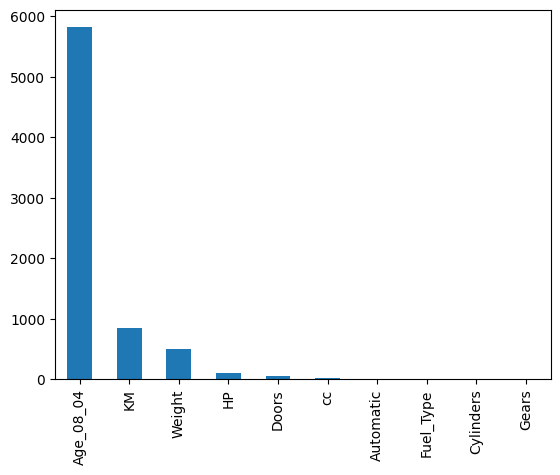

In [21]:
from sklearn.feature_selection import f_regression
f_reg=f_regression(x,y)
pd.Series(f_reg[0],index=x.columns).sort_values(ascending=False).plot(kind="bar")
plt.show()

In [22]:
#This sorts the F-statistics in descending order,
#showing which features have the strongest linear relationship with the target variable.
#as features like doors,cc,automatic,fuel_type etc are not effecting our targetr variable price
#we will drop it.

In [23]:
x.drop(columns=["Doors",'cc','Automatic','Fuel_Type','Cylinders','Gears'],inplace=True)

In [24]:
x.head()

,Age_08_04,KM,HP,Weight
0,23.0,46986.0,90.0,1152.5
1,23.0,72937.0,90.0,1152.5
2,24.0,41711.0,90.0,1152.5
3,26.0,48000.0,90.0,1152.5
4,30.0,38500.0,90.0,1152.5


In [25]:
#scaling
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()
x[["Age_08_04",'KM','HP','Weight']]=std_sca.fit_transform(x[["Age_08_04",'KM','HP','Weight']])

In [26]:
x.head()

,Age_08_04,KM,HP,Weight
0,-1.775799,-0.593750,-0.84485,2.222387
1,-1.775799,0.153546,-0.84485,2.222387
2,-1.721920,-0.745652,-0.84485,2.222387
3,-1.614162,-0.564551,-0.84485,2.222387
4,-1.398645,-0.838117,-0.84485,2.222387


### 2]Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 4)
(288, 4)
(1148, 1)
(288, 1)


### 3]Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

In [29]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

#### Model 1

In [30]:
lin_reg.intercept_

array([10522.5525075])

In [31]:
lin_reg.coef_

array([[-1991.68559891,  -672.78846902,   293.06256315,   559.02486314]])

In [32]:
y_pred=lin_reg.predict(x_test)

In [33]:
r2_score(y_test,y_pred)

0.8502132726053352

Age_08_04: For every one unit increase in the scaled 'Age_08_04', the predicted price decreases by approximately r lin_reg_m coef. units, holding all other features constant.

KM: For every one unit increase in the scaled 'KM', the predicted price decreases by approximately r lin_reg_m.coef units, holding all other features constant.

HP: For every one unit increase in the scaled 'HP', the predicted price increases by approximately r lin_reg_m.coef units, holding all other features constant.

Weight: For every one unit increase in the scaled 'Weight', the predicted price increases by approximately r lin_reg_m units, holding all other features constant.

#### Model 2

In [34]:
x_train_m2 = x_train[['Age_08_04', 'Weight','KM']]
x_test_m2 = x_test[['Age_08_04', 'Weight','KM']]

lin_reg_m2 = LinearRegression()
lin_reg_m2.fit(x_train_m2, y_train)

y_pred_m2 = lin_reg_m2.predict(x_test_m2)

r2_score(y_test, y_pred_m2)

0.849886630461748

Age_08_04: For every one unit increase in the scaled 'Age_08_04', the predicted price decreases by approximately r lin_reg_m, holding 'KM' and 'Weight' constant.

KM: For every one unit increase in the scaled 'KM', the predicted price decreases by approximately r lin_reg_munits, holding 'Age_08_04' and 'Weight' constant.

Weight: For every one unit increase in the scaled 'Weight', the predicted price increases by approximately r lin_reg_m units, holding 'Age_08_04' and 'KM' constant.

#### Model 3

In [35]:
x_train_m3 = x_train[['Age_08_04', 'KM']]
x_test_m3 = x_test[['Age_08_04', 'KM']]

lin_reg_m3 = LinearRegression()
lin_reg_m3.fit(x_train_m3, y_train)

y_pred_m3 = lin_reg_m3.predict(x_test_m3)

r2_score(y_test, y_pred_m3)

0.834167945681471

### 4]Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset

In [37]:
#As we see r2 score for all three models and Model 1 shows highest R2 score
#Hence we prefer model 1 to predict our target variable(Price of Car)

### 5]Apply Lasso and Ridge methods on the model.

#### Lasso

In [38]:
from sklearn.linear_model import Lasso,Ridge

In [39]:
lasso=Lasso(alpha=7)
#here alpha represent lambda randomly any number to make it learn the data , lambda lies b/w 0 to infinity

In [40]:
lasso.fit(x_train,y_train)

Lasso(alpha=7)

In [41]:
lasso.intercept_

array([10522.62002661])

In [42]:
lasso.coef_

array([-1991.89768055,  -667.05765529,   288.25094611,   552.23267685])

In [43]:
#training validation
y_pred=lasso.predict(x_train)
r2_score(y_train,y_pred)

0.8594379973708621

In [44]:
#to get best value for parameter using gridsearch
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
params=dict(alpha=range(1,20))

In [45]:
grid_search=GridSearchCV(lasso,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'alpha': 1}

In [46]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)
y_pred1=lasso.predict(x_test)
r2_score(y_test,y_pred1)

0.850255523817419

#### Ridge

In [48]:
ridge=Ridge(alpha=2)
grid_search=GridSearchCV(ridge,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'alpha': 2}

In [50]:

ridge.fit(x_train,y_train)
y_pred2=ridge.predict(x_test)
r2_score(y_test,y_pred2)

0.8501090175110725

In [51]:
# R2 score for lasso and ridge is same for Model 1 here.
#Showing almost 85% accuracy in predicting the target variable price

In [53]:
'''
INTERVIEW QUESTIONS:


1.
ANSWER:
Normalization and Standardization are preprocessing techniques used to transform numerical features into a common scale,ensuring that no
single variable dominates a machine learning model due to its large magnitude.
Normalization (Min-Max Scaling) Normalization rescales data into a fixed, narrow range, typically between 0 and 1.
Formula: X_{norm}={X-X_{min}}/{X_{max}-X_{min}}
Best for: Distance-based algorithms like K-Nearest Neighbors (KNN), Neural Networks, and image processing (compressing pixel values).
Risk: Highly sensitive to outliers, as extreme values can significantly compress the rest of the data

Standardization (Z-Score Normalization) Standardization transforms data to have a mean of 0 and a standard deviation of 1.
ormula: Z={X-mu }/{sigma } (where mu is the mean and sigmais the standard deviation).
Best for: Algorithms that assume normality or are sensitive to variance, such as Linear Regression, Logistic Regression,
Support Vector Machines (SVM), and Principal Component Analysis (PCA).
Benefit: More robust to outliers than normalization because it does not have a predefined bounded range



2.
ANSWER:
a)Feature Removal: The simplest solution is to drop one of the highly correlated variables. Choose the one with lower predictive power or less business
relevance.
b)Regularization (Shrinkage Methods):
Ridge Regression (L2): Adds a penalty to the square of coefficients. It keeps all variables but shrinks their influence, effectively stabilizing the model without removing data.
Lasso Regression (L1): Adds a penalty based on absolute values, which can force some coefficients to zero, performing automatic feature selection.
Elastic Net: A hybrid of Ridge and Lasso that is particularly useful for grouping correlated variables together.
c)Dimensionality Reduction:
Principal Component Analysis (PCA): Transforms correlated variables into a smaller set of uncorrelated "principal components".
While it eliminates multicollinearity, it makes the model harder to interpret.
Partial Least Squares (PLS) Regression: A supervised alternative to PCA that considers the relationship between predictors and the target variable.
'''


'\nINTERVIEW QUESTIONS:\n\n\n1.\nANSWER:\nNormalization and Standardization are preprocessing techniques used to transform numerical features into a common scale,ensuring that no\nsingle variable dominates a machine learning model due to its large magnitude.\xa0\nNormalization (Min-Max Scaling)\xa0Normalization rescales data into a fixed, narrow range, typically between 0 and 1.\xa0\nFormula: X_{norm}={X-X_{min}}/{X_{max}-X_{min}}\nBest for: Distance-based algorithms like K-Nearest Neighbors (KNN), Neural Networks, and image processing (compressing pixel values).\nRisk: Highly sensitive to outliers, as extreme values can significantly compress the rest of the data\n\nStandardization (Z-Score Normalization)\xa0Standardization transforms data to have a mean of 0 and a standard deviation of 1.\normula: Z={X-mu }/{sigma } (where mu is the mean and sigmais the standard deviation).\nBest for: Algorithms that assume normality or are sensitive to variance, such as Linear Regression, Logistic R